Analysis 1: Closing price of stocks
------------------------------------------------------------------------------------------------

data source: https://www.kaggle.com/datasets/camnugent/sandp500

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

loading apple, google, amazon, microsoft data for analysis

In [7]:
path = r'C:\Users\Lenovo\Desktop\Data Science PortFolio\Time series analysis\S&P 500\individual_stocks_5yr'
company_list = ['AAPL_data.csv','GOOG_data.csv','MSFT_data.csv','AMZN_data.csv']
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(path + '/' + file)
    all_data = pd.concat([all_data, current_df])

all_data.shape

(4752, 7)

In [8]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [13]:
# checking datatype 
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

Here we see the date is in object. so we have to convert it to datetype format and then do the analysis.

In [14]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [15]:
list = all_data['Name'].unique()

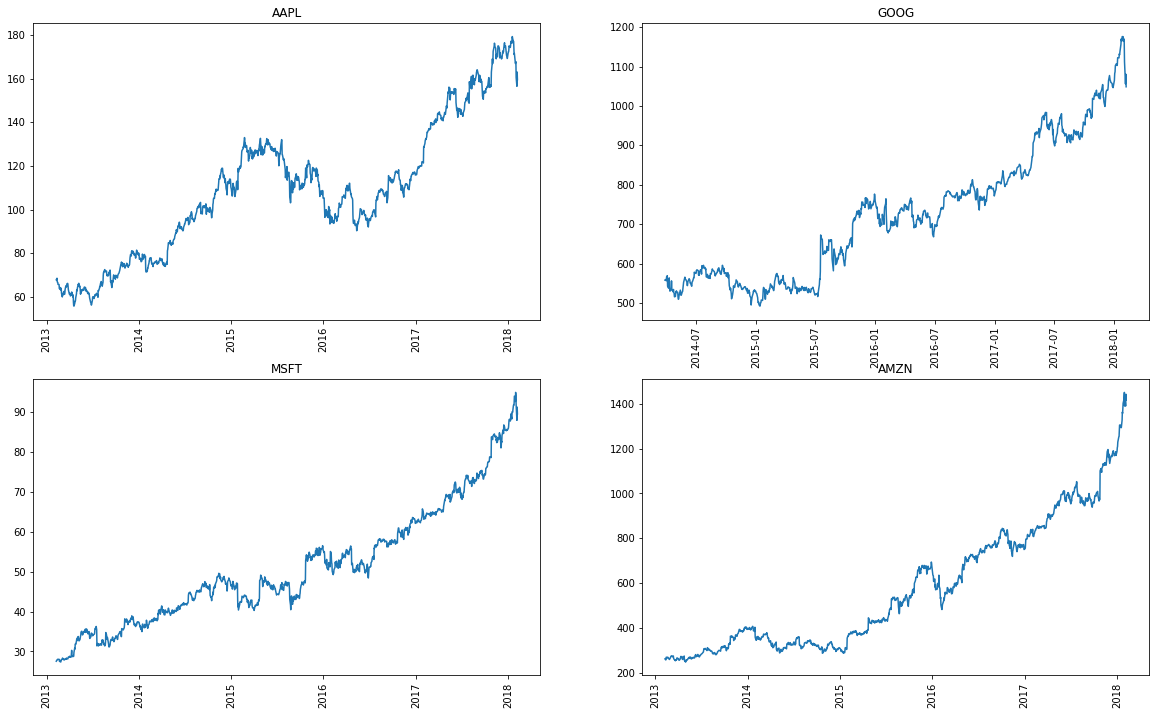

In [17]:
# enumerate() allows us to iterate through a sequence but it keeps track of both the index and the element. enumerate(iterable, start=0). Here we are starting from 1
plt.figure(figsize = (20,12))
for i, company in enumerate(list,1):
    plt.subplot(2,2,i)
    df = all_data[all_data['Name'] == company]
    plt.plot(df['date'], df['close'])
    plt.xticks(rotation = 'vertical')
    plt.title(company)

Analysis 2: Total amount of stocks traded.
------------------------------------------------------------------------------------------------

In [18]:
# Plotly Express is the easy-to-use, high-level interface to Plotly, which operates on a variety of types of data and produces easy-to-style figures. Plotly Express provides functions to visualize a variety of types of data. Most functions such as px. bar or px.
import plotly.express as px

In [19]:
for company in list:
    df = all_data[all_data['Name'] == company]
    figure = px.line(df, x='date', y='volume', title=company)
    figure.show()

Analysis 3: Analysis daily return/price comparison from GOOGLE
------------------------------------------------------------------------------------------------

In [25]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Data Science PortFolio\Time series analysis\S&P 500\individual_stocks_5yr/GOOG_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [26]:
df['Daily price change'] = df['close'] - df['open']
df.head()

,date,open,high,low,close,volume,Name,Daily price change
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG,-9.540
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG,-1.210
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG,-9.920
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG,8.450
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG,1.894


In [27]:
df['Per Day Return'] = ((df['close'] - df['open']) / df['close']) * 100
df.head()

,date,open,high,low,close,volume,Name,Daily price change,Per Day Return
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG,-9.540,-1.708269
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG,-1.210,-0.216075
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG,-9.920,-1.781065
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG,8.450,1.489879
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG,1.894,0.334039


In [30]:
figure = px.line(df, x = 'date', y = 'Per Day Return', title= 'Daily return rate from Google')
figure.show()

Analysis 4: Analyse monthly mean of close feature
------------------------------------------------------------------------------------------------

In [31]:
df2 = df.copy()
df2.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily price change    float64
Per Day Return        float64
dtype: object

In [32]:
df2['date'] = pd.to_datetime(df2['date'])

In [33]:
# setting date as index
df2.set_index('date', inplace=True)
df2.head()

,open,high,low,close,volume,Name,Daily price change,Per Day Return
date,,,,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG,-9.540,-1.708269
2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG,-1.210,-0.216075
2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG,-9.920,-1.781065
2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG,8.450,1.489879
2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG,1.894,0.334039


In [34]:
df2['2014-03-27':'2014-03-31']

,open,high,low,close,volume,Name,Daily price change,Per Day Return
date,,,,,,,,
2014-03-27,568.00,568.00,552.92,558.46,13052,GOOG,-9.54,-1.708269
2014-03-28,561.20,566.43,558.67,559.99,41003,GOOG,-1.21,-0.216075
2014-03-31,566.89,567.00,556.93,556.97,10772,GOOG,-9.92,-1.781065


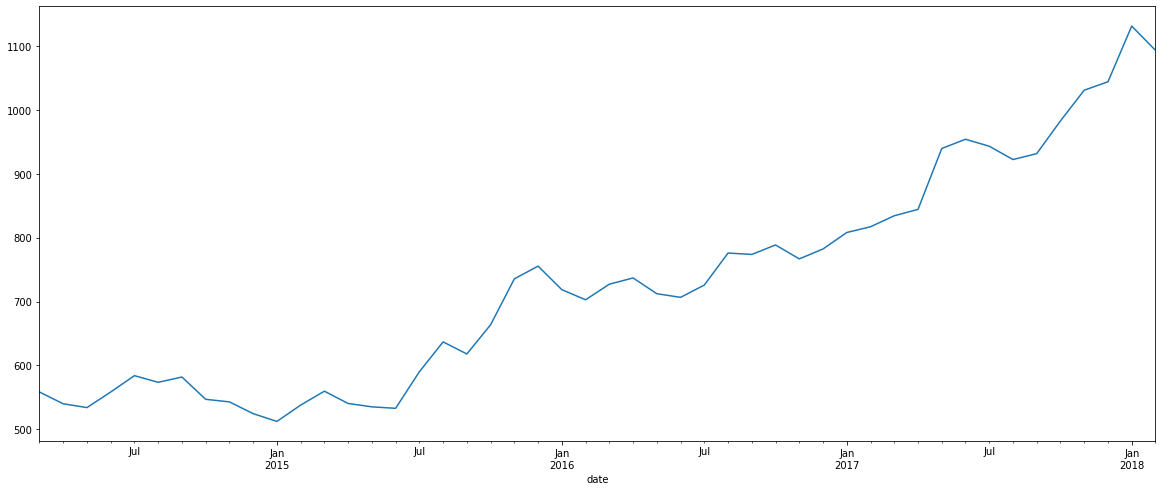

In [58]:
# we resampling data in month basis providing 'M'.
plt.figure(figsize = (20,8))
closing_price_mean = df2['close'].resample('M').mean()
closing_price_mean.plot()

Analysis 5: Analyse wheather stock prices of these tech companies are correlated or not.
------------------------------------------------------------------------------------------------

In [43]:
apple_data = pd.read_csv(r'C:\Users\Lenovo\Desktop\Data Science PortFolio\Time series analysis\S&P 500\individual_stocks_5yr/AAPL_data.csv')

In [44]:
amazon_data = pd.read_csv(r'C:\Users\Lenovo\Desktop\Data Science PortFolio\Time series analysis\S&P 500\individual_stocks_5yr/AMGN_data.csv')

In [45]:
google_data = pd.read_csv(r'C:\Users\Lenovo\Desktop\Data Science PortFolio\Time series analysis\S&P 500\individual_stocks_5yr/GOOG_data.csv')

In [48]:
microsoft_data = pd.read_csv(r'C:\Users\Lenovo\Desktop\Data Science PortFolio\Time series analysis\S&P 500\individual_stocks_5yr/MSFT_data.csv')

In [49]:
# creating a blank data frame
close = pd.DataFrame()

In [64]:
close['aapl'] = apple_data['close']
close['goog'] = google_data['close']
close['amzn'] = amazon_data['close']
close['msft'] = microsoft_data['close']

In [65]:
close.head()

,aapl,amzn,goog,msft
0,67.8542,86.77,558.46,27.55
1,68.5614,84.92,559.99,27.86
2,66.8428,84.54,556.97,27.88
3,66.7156,84.94,567.16,28.03
4,66.6556,84.72,567.00,28.04


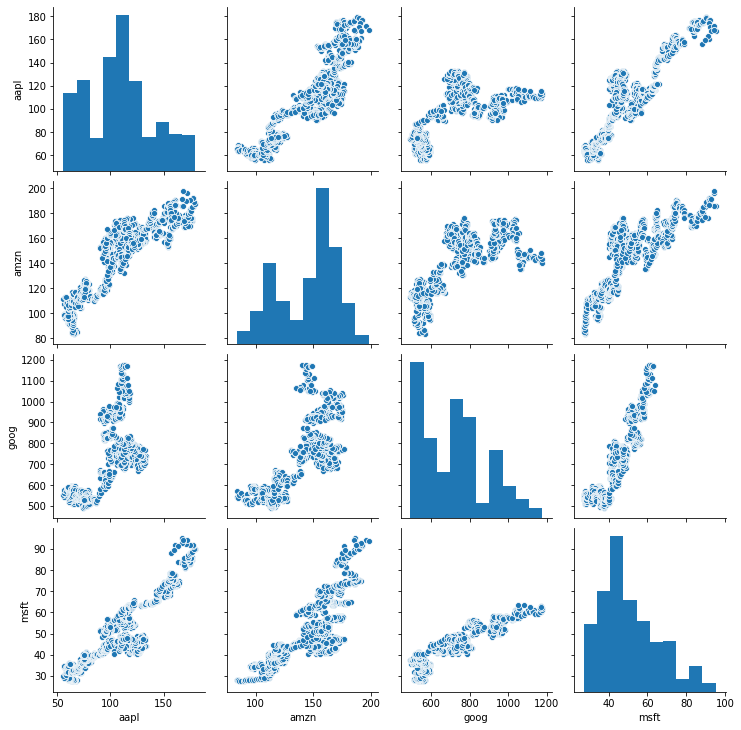

In [60]:
# A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.
sns.pairplot(data = close)

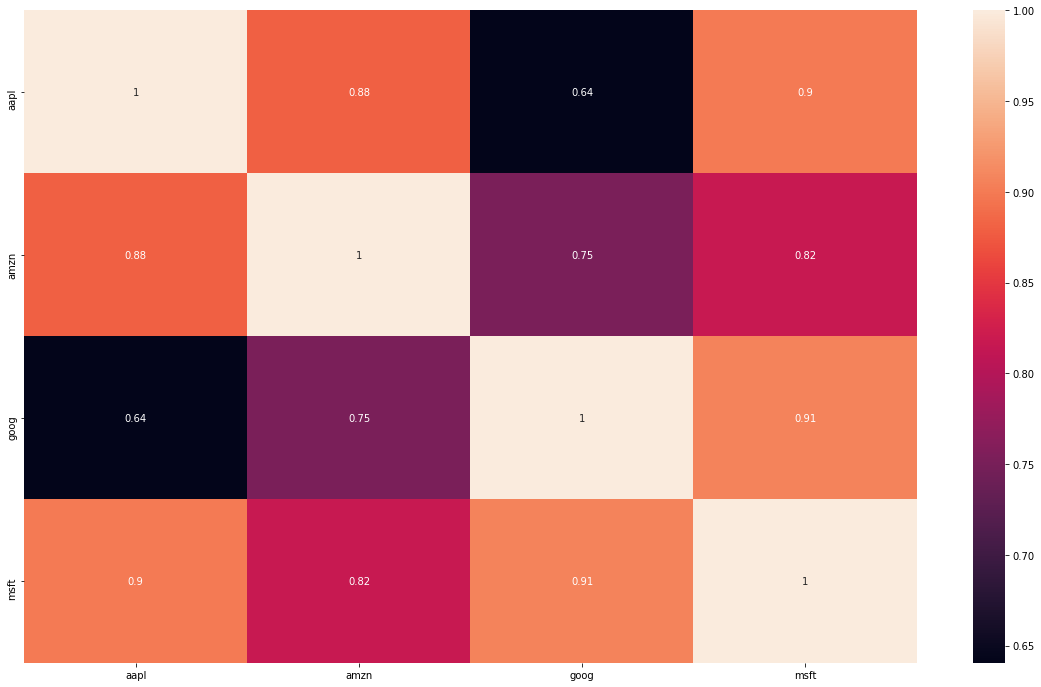

In [63]:
plt.figure(figsize = (20,12))
sns.heatmap(close.corr(), annot = True)

We can see there is a correlation between google and microsoft. which is 0.91

Analysis 6: Daily return of each stock and how they are correlated.
------------------------------------------------------------------------------------------------

In [67]:
data = pd.DataFrame()

In [68]:
data['apple change'] = ((apple_data['close'] - apple_data['open']) / apple_data['close']) * 100
data['google change'] = ((google_data['close'] - google_data['open']) / google_data['close']) * 100
data['amazon change'] = ((amazon_data['close'] - amazon_data['open']) / amazon_data['close']) * 100
data['microsoft change'] = ((microsoft_data['close'] - microsoft_data['open']) / microsoft_data['close']) * 100

In [70]:
data.head()

,apple change,google change,amazon change,microsoft change
0,0.206325,-1.708269,1.336868,0.725953
1,0.714688,-0.216075,-0.659444,0.753769
2,-2.481344,-1.781065,-0.544121,0.000000
3,-0.042869,1.489879,-0.023546,0.356761
4,0.443624,0.334039,-1.510859,0.427960


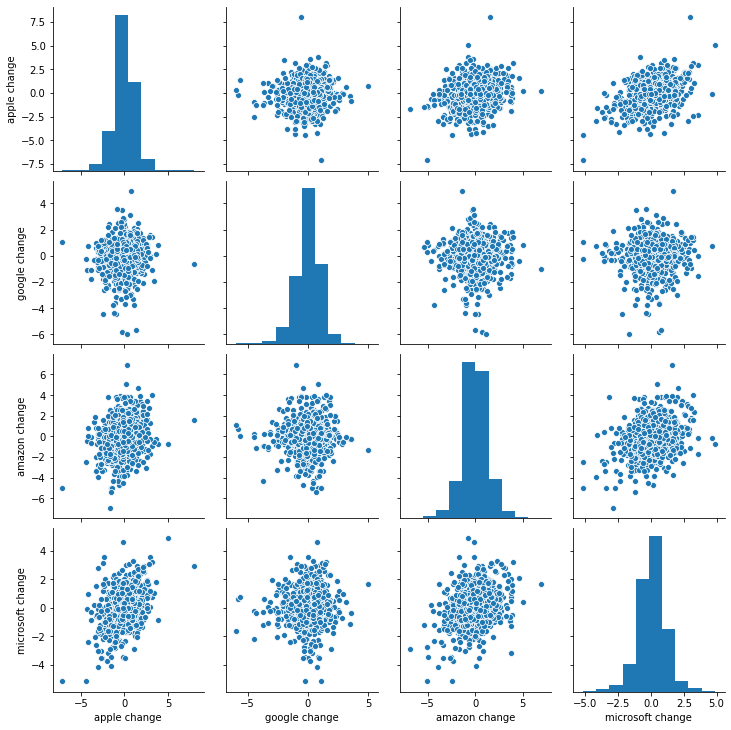

In [72]:
sns.pairplot(data = data)

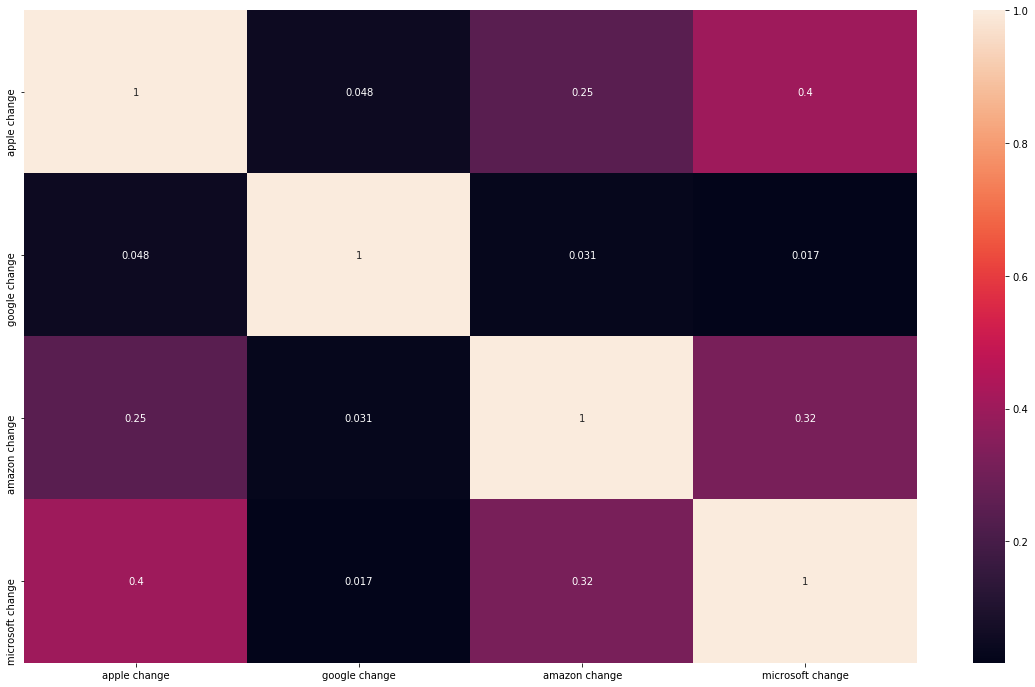

In [73]:
plt.figure(figsize = (20,12))
sns.heatmap(data.corr(), annot = True)

In [77]:
data.describe()

,apple change,google change,amazon change,microsoft change
count,1259.000000,975.000000,1259.000000,1259.000000
mean,-0.000215,-0.012495,-0.006999,0.076404
std,1.187138,1.092560,1.337707,1.059260
min,-7.104299,-5.952266,-6.907010,-5.177618
25%,-0.658021,-0.551963,-0.704850,-0.509241
50%,0.042230,0.024951,-0.012964,0.061069
75%,0.715427,0.672649,0.731484,0.703264
max,8.000388,4.943550,6.948399,4.861491


In [78]:
# Transpose index and columns. Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa. 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
apple change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
google change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
amazon change,1259.0,-0.006999,1.337707,-6.907010,-0.704850,-0.012964,0.731484,6.948399
microsoft change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
